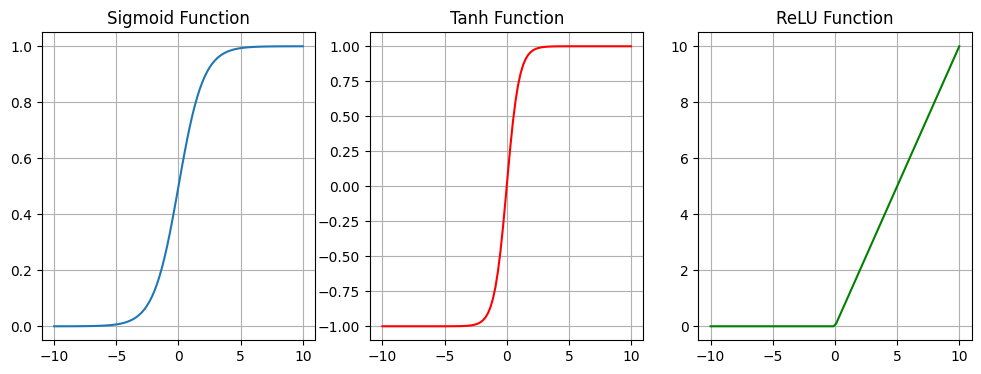

Epoch 1/50, Loss: 0.6931471805599452
Epoch 2/50, Loss: 0.6809340896149912
Epoch 3/50, Loss: 0.6692134605592132
Epoch 4/50, Loss: 0.6579596993937068
Epoch 5/50, Loss: 0.6471484415905454
Epoch 6/50, Loss: 0.6367565521019387
Epoch 7/50, Loss: 0.6267621108845787
Epoch 8/50, Loss: 0.617144386921436
Epoch 9/50, Loss: 0.6078838033777881
Epoch 10/50, Loss: 0.5989618961762783
Epoch 11/50, Loss: 0.5903612679343709
Epoch 12/50, Loss: 0.5820655388881373
Epoch 13/50, Loss: 0.5740592961357832
Epoch 14/50, Loss: 0.5663280422761505
Epoch 15/50, Loss: 0.5588581442924386
Epoch 16/50, Loss: 0.551636783338674
Epoch 17/50, Loss: 0.5446519059239087
Epoch 18/50, Loss: 0.537892176854004
Epoch 19/50, Loss: 0.5313469341800837
Epoch 20/50, Loss: 0.5250061463131728
Epoch 21/50, Loss: 0.5188603713931829
Epoch 22/50, Loss: 0.512900718944425
Epoch 23/50, Loss: 0.5071188138067018
Epoch 24/50, Loss: 0.5015067622985212
Epoch 25/50, Loss: 0.4960571205451029
Epoch 26/50, Loss: 0.49076286488698756
Epoch 27/50, Loss: 0.485

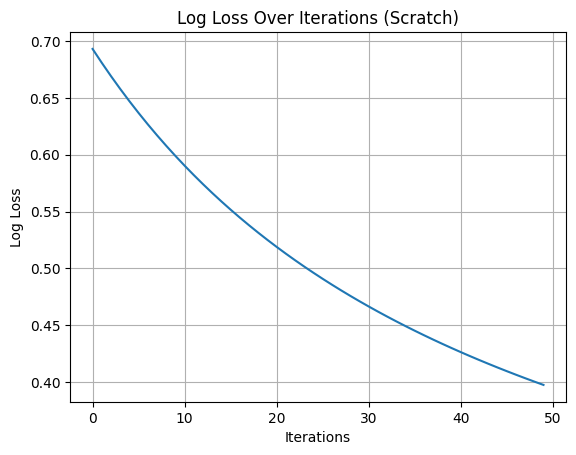

Log Loss (Scratch): 0.40169186906962084
Log Loss (Sklearn): 0.11816995456460379


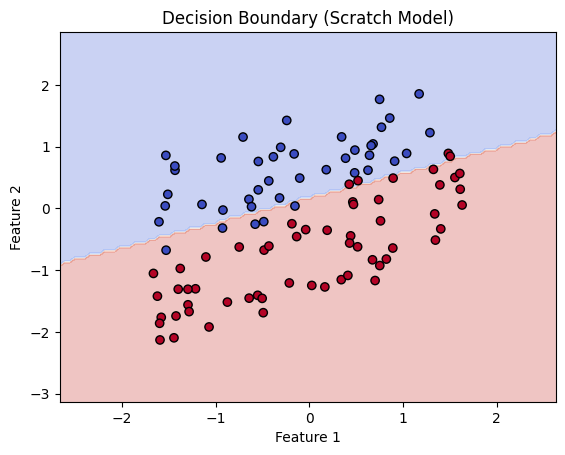

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

# Load dataset (Predicting whether a customer will purchase a product based on ad clicks)
df = pd.read_csv("customer_ad_click_data.csv")
X = df[['Time_Spent_on_Ad', 'Number_of_Clicks']].values
y = df['Purchased'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(z):
    return np.maximum(0, z)

# Log Loss function
def compute_log_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Plot activation functions
x_vals = np.linspace(-10, 10, 100)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(x_vals, sigmoid(x_vals), label='Sigmoid')
plt.title("Sigmoid Function")
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(x_vals, tanh(x_vals), label='Tanh', color='red')
plt.title("Tanh Function")
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(x_vals, relu(x_vals), label='ReLU', color='green')
plt.title("ReLU Function")
plt.grid()
plt.show()

# Logistic Regression from scratch
class LogisticRegressionScratch:
    def __init__(self, lr=0.1, epochs=50):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1] + 1)
        X_bias = np.c_[np.ones(X.shape[0]), X]
        loss_history = []

        for epoch in range(self.epochs):
            z = np.dot(X_bias, self.theta)
            y_pred = sigmoid(z)
            gradient = np.dot(X_bias.T, (y_pred - y)) / y.shape[0]
            self.theta -= self.lr * gradient
            loss = compute_log_loss(y, y_pred)
            loss_history.append(loss)
            print(f"Epoch {epoch + 1}/{self.epochs}, Loss: {loss}")

        # Plot loss history
        plt.plot(loss_history)
        plt.title("Log Loss Over Iterations (Scratch)")
        plt.xlabel("Iterations")
        plt.ylabel("Log Loss")
        plt.grid()
        plt.show()

    def predict_proba(self, X):
        X_bias = np.c_[np.ones(X.shape[0]), X]
        return sigmoid(np.dot(X_bias, self.theta))

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

# Train custom logistic regression model
model_scratch = LogisticRegressionScratch(lr=0.1, epochs=50)
model_scratch.fit(X_train, y_train)
y_pred_scratch = model_scratch.predict_proba(X_test)
log_loss_scratch = compute_log_loss(y_test, y_pred_scratch)

# Train logistic regression using sklearn
model_sklearn = LogisticRegression()
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict_proba(X_test)[:, 1]
log_loss_sklearn = log_loss(y_test, y_pred_sklearn)

# Print results
print(f"Log Loss (Scratch): {log_loss_scratch}")
print(f"Log Loss (Sklearn): {log_loss_sklearn}")


# Plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.title("Decision Boundary (Scratch Model)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(model_scratch, X_test, y_test)
